In [1]:
import numpy as np # linear algebra
np.random.seed(10)
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Required magic to display matplotlib plots in notebooks
%matplotlib inline

from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split

# Input data files should be available in relevant directory.

data = pd.read_csv('/content/data.csv')

data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


For the purpose of our lab, we will use a very basic Multi-Layer Perceptron to predict if a set of passengers survived; as a feature, we will only use the Passenger Class for sake of simplicity.

In [2]:
# We define a dictionary to transform the 0,1 values in the labels to a String that defines the fate of the passenger
dict_live = {
    0 : 'Perished',
    1 : 'Survived'
}

# We define a dictionary to binarize the sex
dict_sex = {
    'male' : 0,
    'female' : 1
}

# We apply the dictionary using a lambda function and the pandas .apply() module
data['Bsex'] = data['Sex'].apply(lambda x : dict_sex[x])


# Now the features are a 2 column matrix whose entries are the Class (1,2,3) and the Sex (0,1) of the passengers
features = data[['Pclass', 'Bsex']].to_numpy()
labels = data['Survived'].to_numpy()

## Perceptron

In [3]:
# Define the sigmoid activator; we ask if we want the sigmoid or its derivative
def sigmoid_act(x, der=False):
    import numpy as np

    if (der==True) : #derivative of the sigmoid
        f = x/(1-x)
    else : # sigmoid
        f = 1/(1+ np.exp(-x))

    return f

# We may employ the Rectifier Linear Unit (ReLU)
def ReLU_act(x, der=False):
    import numpy as np

    if (der== True):
        if x>0 :
            f= 1
        else :
            f = 0
    else :
        if x>0:
            f = x
        else :
            f = 0
    return f

# Now we are ready to define the perceptron;
# it eats a np.array (that may be a list of features )
def perceptron(X, act='Sigmoid'):
    import numpy as np

    shapes = X.shape # Pick the number of (rows, columns)!
    n= shapes[0]+shapes[1]

    # ***************************
    # TASK 1 - GENERATING WEIGHTS AND BIAS
    # ***************************

    # Initializing the weights and bias for perceptron.
    # Weights (w) are the parameters that determine the importance of input features in making predictions.
    # Initially, we assign random values to weights, which are then updated during training.
    # Bias (b) is an extra parameter that helps shift the decision boundary to better fit the data.
    # It ensures that the model can fit datasets where outputs are not centered around the origin.

    # The weights should be initialized randomly between -1 and 1.
    # Use the provided variable shapes to determine the dimensions of the weight matrix.
    # The shapes variable will already contain the required input and output sizes.

    # WRITE YOUR CODE HERE
    # Initialize weights and bias with random values between -1 and 1
    w = np.random.uniform(-1, 1, (shapes[0], shapes[1]))
    b = np.random.uniform(-1, 1, shapes[1])

    # ***************************
    # ***************************

    # Initialize the function
    f = b[0]
    for i in range(0, X.shape[0]-1) : # run over column elements
        for j in range(0, X.shape[1]-1) : # run over rows elements
            f += w[i, j]*X[i,j]/n
    # Pass it to the activation function and return it as an output
    if act == 'Sigmoid':
        output = sigmoid_act(f)
    else :
        output = ReLU_act(f)

    return output

An example of an output of the Perceptron

In [4]:
print('Output with sigmoid activator: ', perceptron(features))
print('Output with ReLU activator: ', perceptron(features))

Output with sigmoid activator:  0.559032809482142
Output with ReLU activator:  0.46402938411219996


## Sigmoid and ReLU Activation Functions

In [5]:
import numpy as np

# Define the sigmoid activator; we ask if we want the sigmoid or its derivative
def sigmoid_act(x, der=False):
    import numpy as np

    if (der==True) : #derivative of the sigmoid
        f = 1/(1+ np.exp(- x))*(1-1/(1+ np.exp(- x)))
    else : # sigmoid
        f = 1/(1+ np.exp(- x))

    return f

# We may employ the Rectifier Linear Unit (ReLU)
def ReLU_act(x, der=False):
    import numpy as np

    if (der == True): # the derivative of the ReLU is the Heaviside Theta
        f = np.heaviside(x, 1)
    else :
        f = np.maximum(x, 0)

    return f

## Train/Test split

In [6]:
# split into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(features, labels, test_size=0.30)

print('Training records:',Y_train.size)
print('Test records:',Y_test.size)

Training records: 623
Test records: 268


## Training the ANN

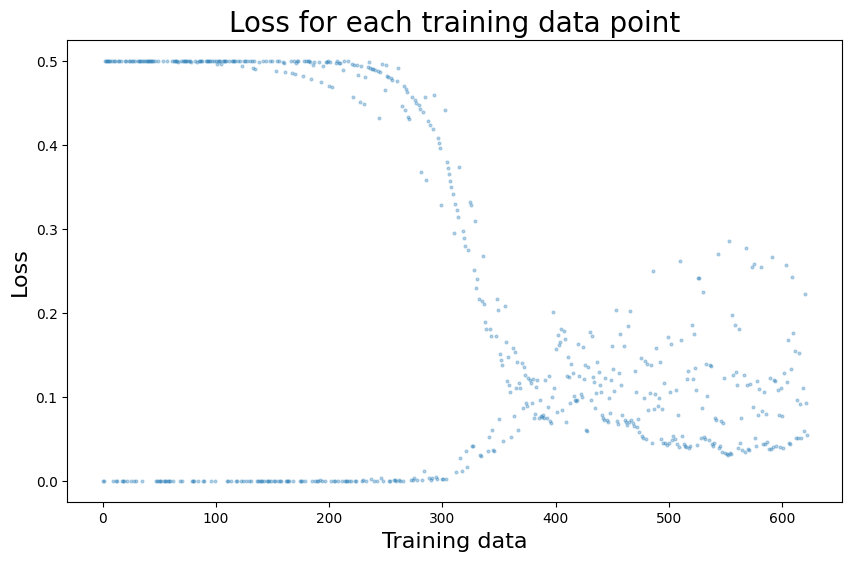

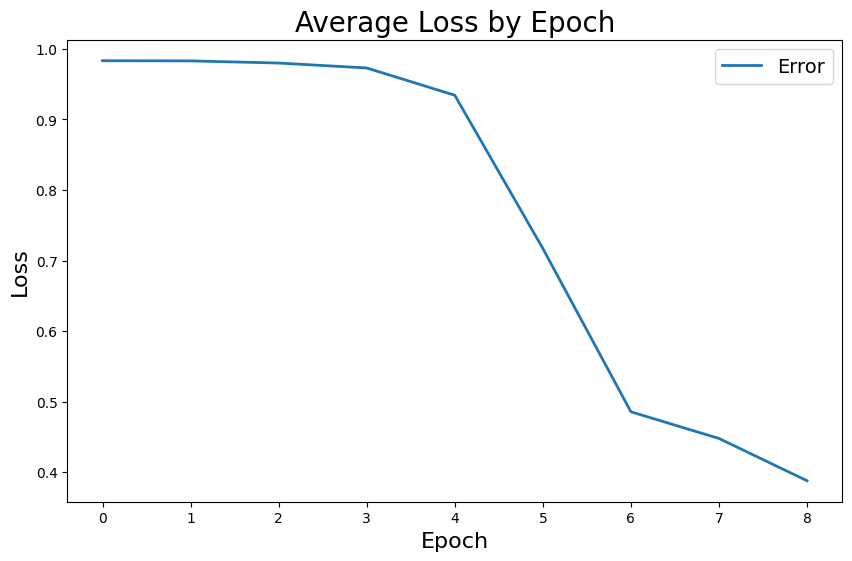

In [7]:
# Set up the number of perceptron per each layer:
p=4 # Layer 1
q=4 # Layer 2

# Set up the Learning rate
eta =  1/623


# Step 01: Random initialize the relevant data
w1 = 2*np.random.rand(p , X_train.shape[1]) - 0.5 # Layer 1
b1 = np.random.rand(p)

w2 = 2*np.random.rand(q , p) - 0.5  # Layer 2
b2 = np.random.rand(q)

wOut = 2*np.random.rand(q) - 0.5  # Output Layer
bOut = np.random.rand(1)

mu = []
vec_y = []

# Start looping over the passengers, i.e. over I.

for I in range(0, X_train.shape[0]): #loop in all the passengers:

    # 1: input the data
    x = X_train[I]


    # 2: Start the algorithm

    # 2.1: Feed forward

    # ****************************
    # TASK 2 - FORWARD PROPAGATION
    # ****************************

    # Use the weights (w1), bias (b1), and input data (x) to compute z1, then apply the ReLU activation function.
    # Use the output of the first layer (z1) along with the weights (w2) and bias (b2) to compute the next linear combination, followed by the ReLU activation function.
    # Use the output of the second layer (z2), along with the weights (wOut) and bias (bOut), to compute the final output. Apply sigmoid activation function to make the output fall in the range (0, 1).

    # WRITE YOUR CODE HERE
    z1 = ReLU_act(np.dot(x, w1.T) + b1) # Output of layer 1
    z2 = ReLU_act(np.dot(z1, w2.T) + b2) # Output of layer 2
    y = sigmoid_act(np.dot(z2, wOut.T) + bOut) # Output of the last layer

    # ****************************
    # ****************************

    # 2.2: Compute the output layer's error
    delta_Out =  (y-Y_train[I]) * sigmoid_act(y, der=True)

    # 2.3: Backpropagate

    # *************************************
    # TASK 3 - BACKPROPAGATION ERROR UPDATE
    # *************************************

    # Calculate the second layer's error signal (delta_2)
    # Start with the error signal from the output layer (delta_Out).
    # Multiply it with the output layer weights and the derivative of the activation function at z2. (see ReLU_act function)

    # Calculate the first layer's error signal (delta_1)
    # Use the second layer's error (delta_2) and propagate it back to the first layer.
    # This time, apply weights of the second layer and the derivative of the activation function at z1. (see ReLU_act function)

    # WRITE YOUR CODE HERE
    delta_2 = delta_Out * wOut * ReLU_act(z2, der=True)
    delta_1 = np.dot(delta_2,w2.T) * ReLU_act(z1, der=True)

    # *************************************
    # *************************************

    # 3: Gradient descent
    wOut = wOut - eta*delta_Out*z2  # Outer Layer
    bOut = bOut - eta*delta_Out

    w2 = w2 - eta*np.kron(delta_2, z1).reshape(q,p) # Hidden Layer 2
    b2 = b2 - eta*delta_2

    w1 = w1 - eta*np.kron(delta_1, x).reshape(p, x.shape[0]) # Hidden Layer 1
    b1 = b1 - eta*delta_1

    # 4. Computation of the loss function
    mu.append((1/2)*(y-Y_train[I])**2)
    vec_y.append(y[0])


# Plotting the Cost function for each training data
plt.figure(figsize=(10,6))
plt.scatter(np.arange(0, X_train.shape[0]), mu, alpha=0.3, s=4, label='mu')
plt.title('Loss for each training data point', fontsize=20)
plt.xlabel('Training data', fontsize=16)
plt.ylabel('Loss', fontsize=16)
plt.show()

# Plotting the average cost function over 10 training data
pino = []
for i in range(0, 9):
    pippo = 0
    for m in range(0, 59):
        pippo+=vec_y[60*i+m]/60
    pino.append(pippo)

plt.figure(figsize=(10, 6))
plt.plot(np.arange(0, 9), pino, alpha=1, label='Error', linewidth=2)
plt.title('Average Loss by Epoch', fontsize=20)
plt.xlabel('Epoch', fontsize=16)
plt.ylabel('Loss', fontsize=16)
plt.legend(fontsize=14)
plt.show()

## Training as a Function

In [19]:
def ANN_train(X_train, Y_train, p=4, q=4, eta=0.0015):
    import numpy as np
    import matplotlib.pyplot as plt

    # 0: Random initialize the relevant data
    w1 = 2*np.random.rand(p , X_train.shape[1]) - 0.5 # Layer 1
    b1 = np.random.rand(p)

    w2 = 2*np.random.rand(q , p) - 0.5  # Layer 2
    b2 = np.random.rand(q)

    wOut = 2*np.random.rand(q) - 0.5   # Output Layer
    bOut = np.random.rand(1)

    mu = []
    vec_y = []

    # Start looping over the passengers, i.e. over I.

    for I in range(0, X_train.shape[0]-1): #loop in all the passengers:

        # 1: input the data
        x = X_train[I]

        # 2: Start the algorithm

        # 2.1: Feed forward

        # *********************************************
        # Complete the following like you did in Task 2
        # *********************************************

        z1 = ReLU_act(np.dot(x, w1.T) + b1) # Output of layer 1
        z2 = ReLU_act(np.dot(z1, w2.T) + b2) # Output of layer 2
        y = sigmoid_act(np.dot(z2, wOut.T) + bOut) # Output of the last layer

        # *********************************************

        #2.2: Compute the output layer's error
        delta_Out = 2 * (y-Y_train[I]) * sigmoid_act(y, der=True)

        #2.3: Backpropagate

        # *********************************************
        # Complete the following like you did in Task 3
        # *********************************************
        delta_2 = delta_Out * wOut * ReLU_act(z2, der=True)
        delta_1 = np.dot(w2.T, delta_2) * ReLU_act(z1, der=True)

        # *********************************************

        # 3: Gradient descent
        wOut = wOut - eta*delta_Out*z2  # Outer Layer
        bOut = bOut - eta*delta_Out

        w2 = w2 - eta*np.kron(delta_2, z1).reshape(q,p) # Hidden Layer 2
        b2 = b2 -  eta*delta_2

        w1 = w1 - eta*np.kron(delta_1, x).reshape(p, x.shape[0])
        b1 = b1 - eta*delta_1

        # 4. Computation of the loss function
        mu.append((y-Y_train[I])**2)
        vec_y.append(y)

    batch_loss = []
    for i in range(0, 10):
        loss_avg = 0
        for m in range(0, 60):
            loss_avg+=vec_y[60*i+m]/60
        batch_loss.append(loss_avg)


    plt.figure(figsize=(10, 6))
    plt.plot(np.arange(1, len(batch_loss) + 1), batch_loss, alpha=1, label='Error', linewidth=2)
    plt.title('Average Loss by Epoch', fontsize=20)
    plt.xlabel('Epoch', fontsize=16)
    plt.ylabel('Loss', fontsize=16)
    plt.legend(fontsize=14)
    plt.show()

    return w1, b1, w2, b2, wOut, bOut, mu

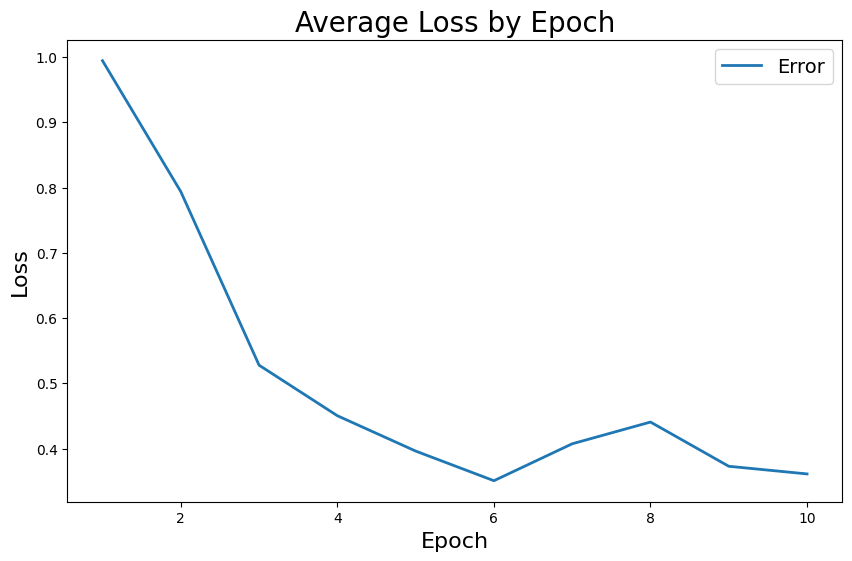

In [21]:
w1, b1, w2, b2, wOut, bOut, mu = ANN_train(X_train, Y_train, p=8, q=4, eta=0.0015)

## Compute Predictions

In [22]:
def ANN_pred(X_test, w1, b1, w2, b2, wOut, bOut, mu):
    import numpy as np

    pred = []

    for I in range(0, X_test.shape[0]): #loop in all the passengers
        # 1: input the data
        x = X_test[I]

        # 2.1: Feed forward

        # *********************************************
        # Complete the following like you did in Task 2
        # *********************************************

        # WRITE YOUR CODE HERE
        z1 = ReLU_act(np.dot(x, w1.T) + b1) # Output of layer 1
        z2 = ReLU_act(np.dot(z1, w2.T) + b2) # Output of layer 2
        y = sigmoid_act(np.dot(z2, wOut.T) + bOut) # Output of the last layer

        # *********************************************

        # Append the prediction;
        # We now need a binary classifier; we this apply an Heaviside Theta and we set to 0.5 the threshold
        # if y < 0.5 the output is zero, otherwise is 1
        pred.append( np.heaviside(y - 0.5, 1)[0] )


    return np.array(pred);

In [23]:
predictions = ANN_pred(X_test, w1, b1, w2, b2, wOut, bOut, mu)

## Confusion Matrix

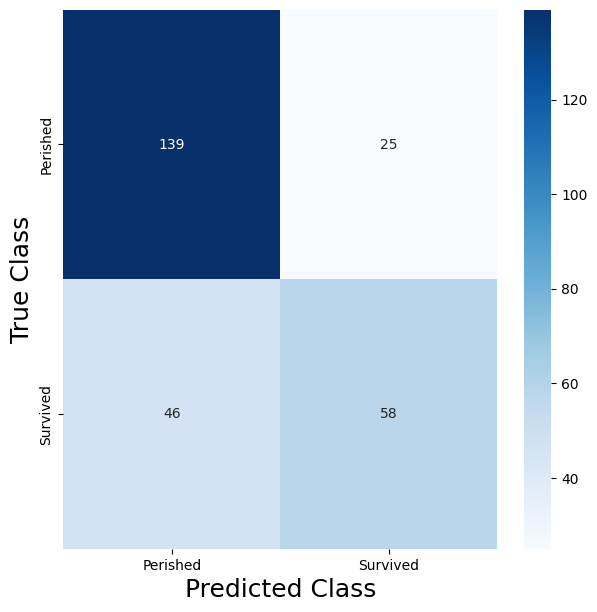

In [24]:
# Plot the confusion matrix
cm = confusion_matrix(Y_test, predictions)

df_cm = pd.DataFrame(cm, index = [dict_live[i] for i in range(0,2)], columns = [dict_live[i] for i in range(0,2)])
plt.figure(figsize = (7,7))
sns.heatmap(df_cm, annot=True, cmap=plt.cm.Blues, fmt='g')
plt.xlabel("Predicted Class", fontsize=18)
plt.ylabel("True Class", fontsize=18)
plt.show()